# Explore here

In [1]:
# Your code here
import pandas as pd
import os

# Ruta absoluta del directorio actual
current_dir = os.getcwd()
print("Directorio de trabajo actual:\n", current_dir, "\n")

#URL of the Dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

#Download and load the dataset into a Dataframe
data = pd.read_csv(url)
print(data.head(), "\n")

# Save the DataFrame to a local CSV file in the '../data/raw/' directory
data.to_csv('../data/raw/AB_NYC_2019.csv', index=False)
print(f'File saved at: ../data/raw/AB_NYC_2019.csv')



Directorio de trabajo actual:
 /workspaces/machine-learning-python-template-Alejandro-Manzanares-2/src 

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_

In [2]:
# Obtener las dimensiones
data.shape

(48895, 16)

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
data.drop("latitude", axis = 1).duplicated().sum()
data.drop("longitude", axis = 1).duplicated().sum()
if data.drop("latitude", axis = 1).duplicated().sum() == 0 and data.drop("longitude", axis = 1).duplicated().sum() ==0:
    print("No hay viviendas duplicadas")
else:
    print("Hay viviendas duplciadas")

No hay viviendas duplicadas


In [5]:
data.drop(["name", "last_review", "number_of_reviews"], axis = 1, inplace = True)
data.head()


,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,NaN,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0.10,1,0


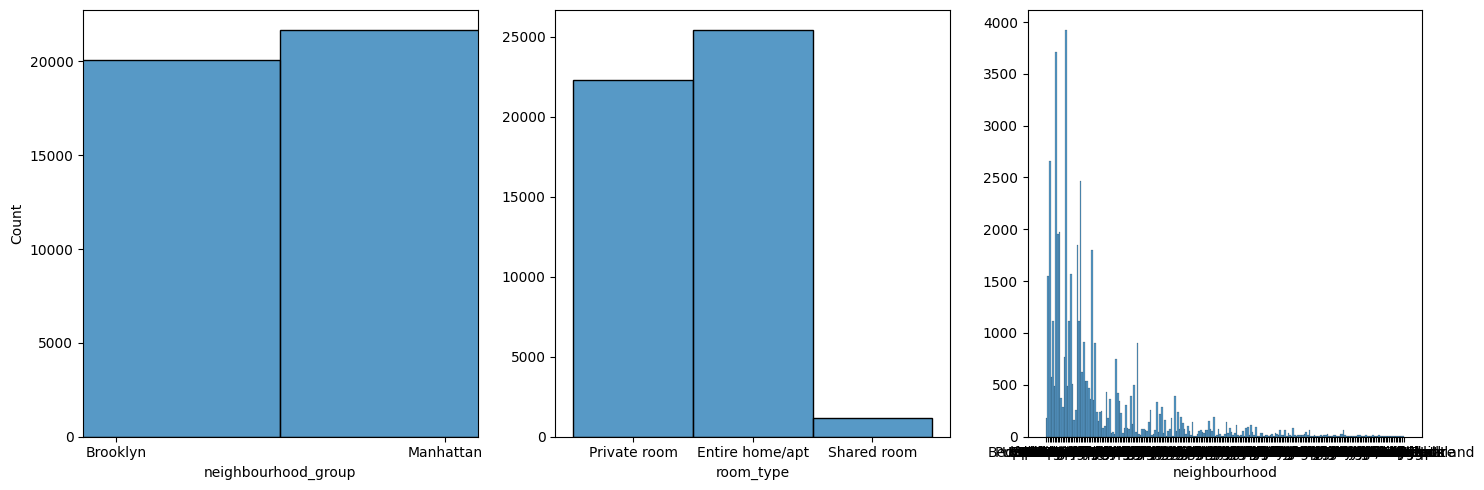

In [6]:
#variables categóricas
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = data, x = "neighbourhood_group").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[1], data = data, x = "room_type").set(ylabel = None)
sns.histplot(ax = axis[2], data = data, x = "neighbourhood").set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

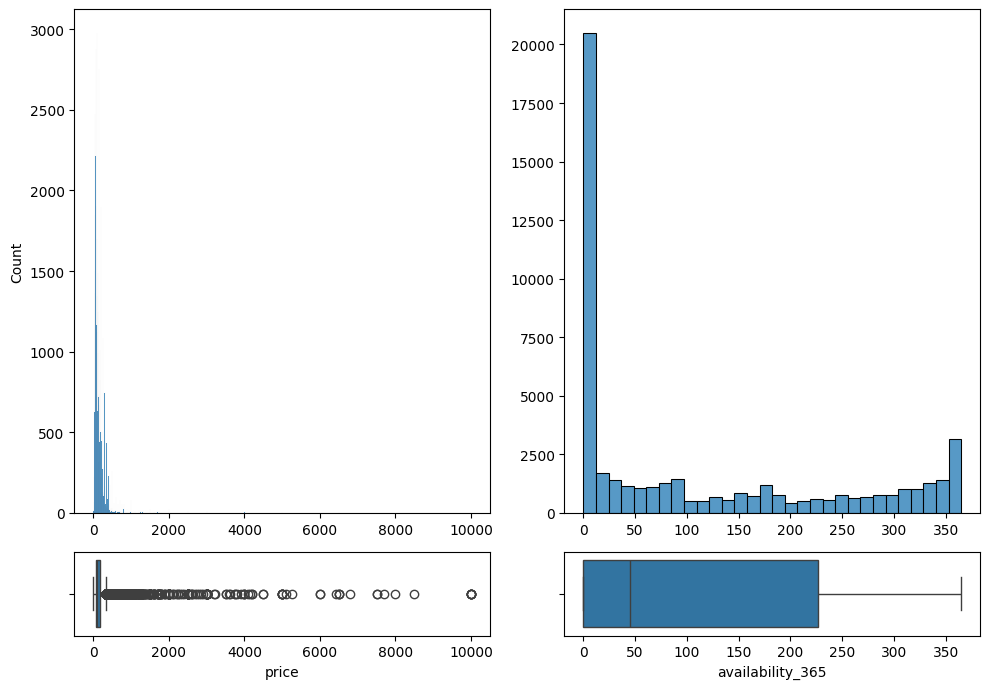

In [7]:
#Variables numéricas
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "price")
sns.histplot(ax = axis[0, 1], data = data, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

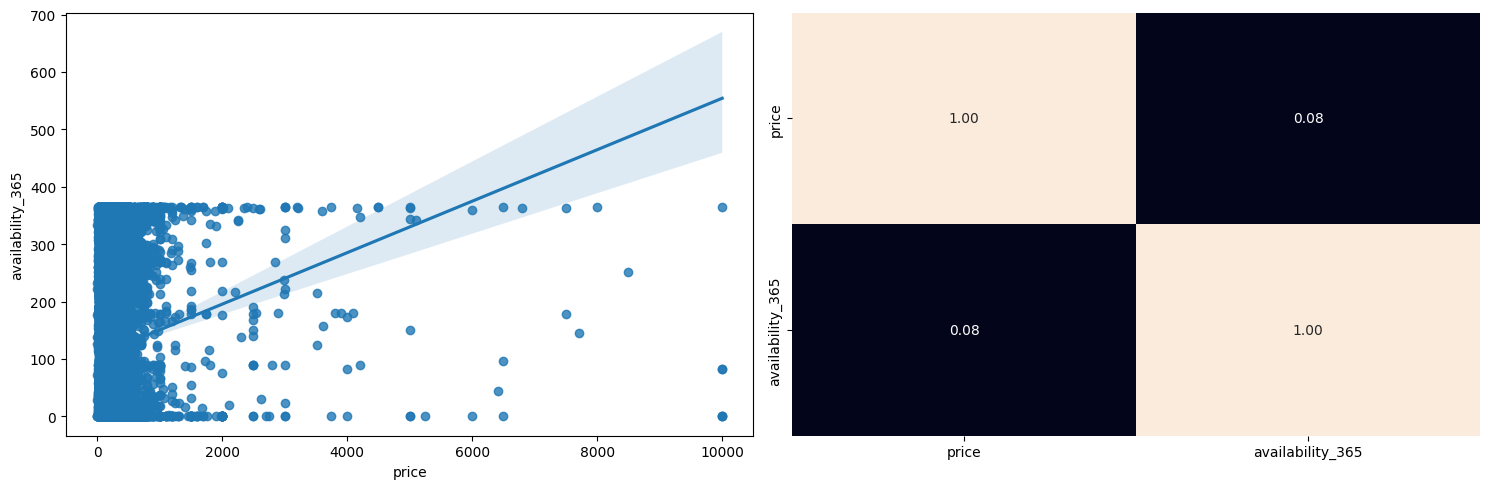

In [8]:
#Análisis numérico-numérico
fig, axis = plt.subplots(1, 2, figsize = (15, 5))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = data, x = "price", y = "availability_365")
sns.heatmap(data[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

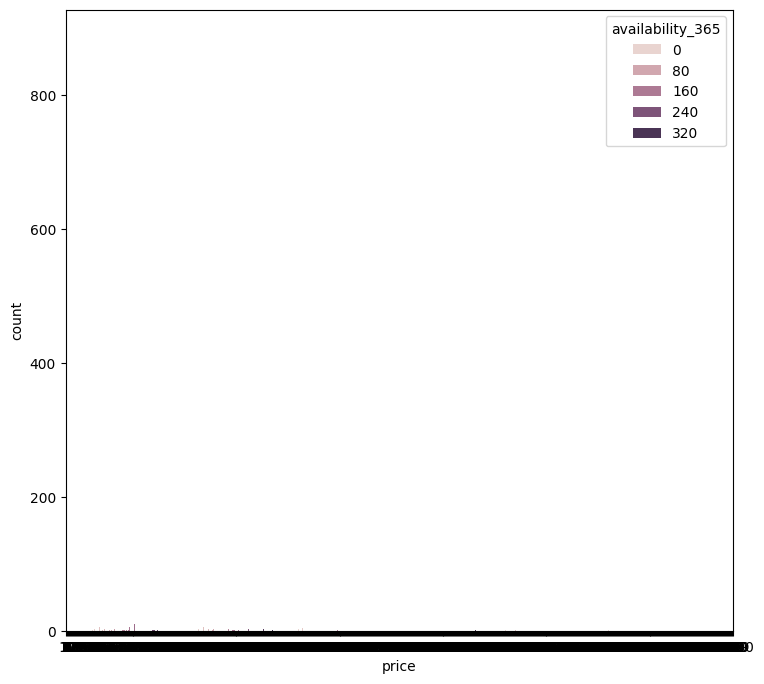

In [9]:
fig, axis = plt.subplots(1,2, figsize = (15, 7))

sns.countplot(ax = axis[0], data = data, x = "price", hue = "availability_365")

plt.tight_layout()
fig.delaxes(axis[1])

plt.show()

In [ ]:
#Día 2
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,58.500000,327.000000,365.000000


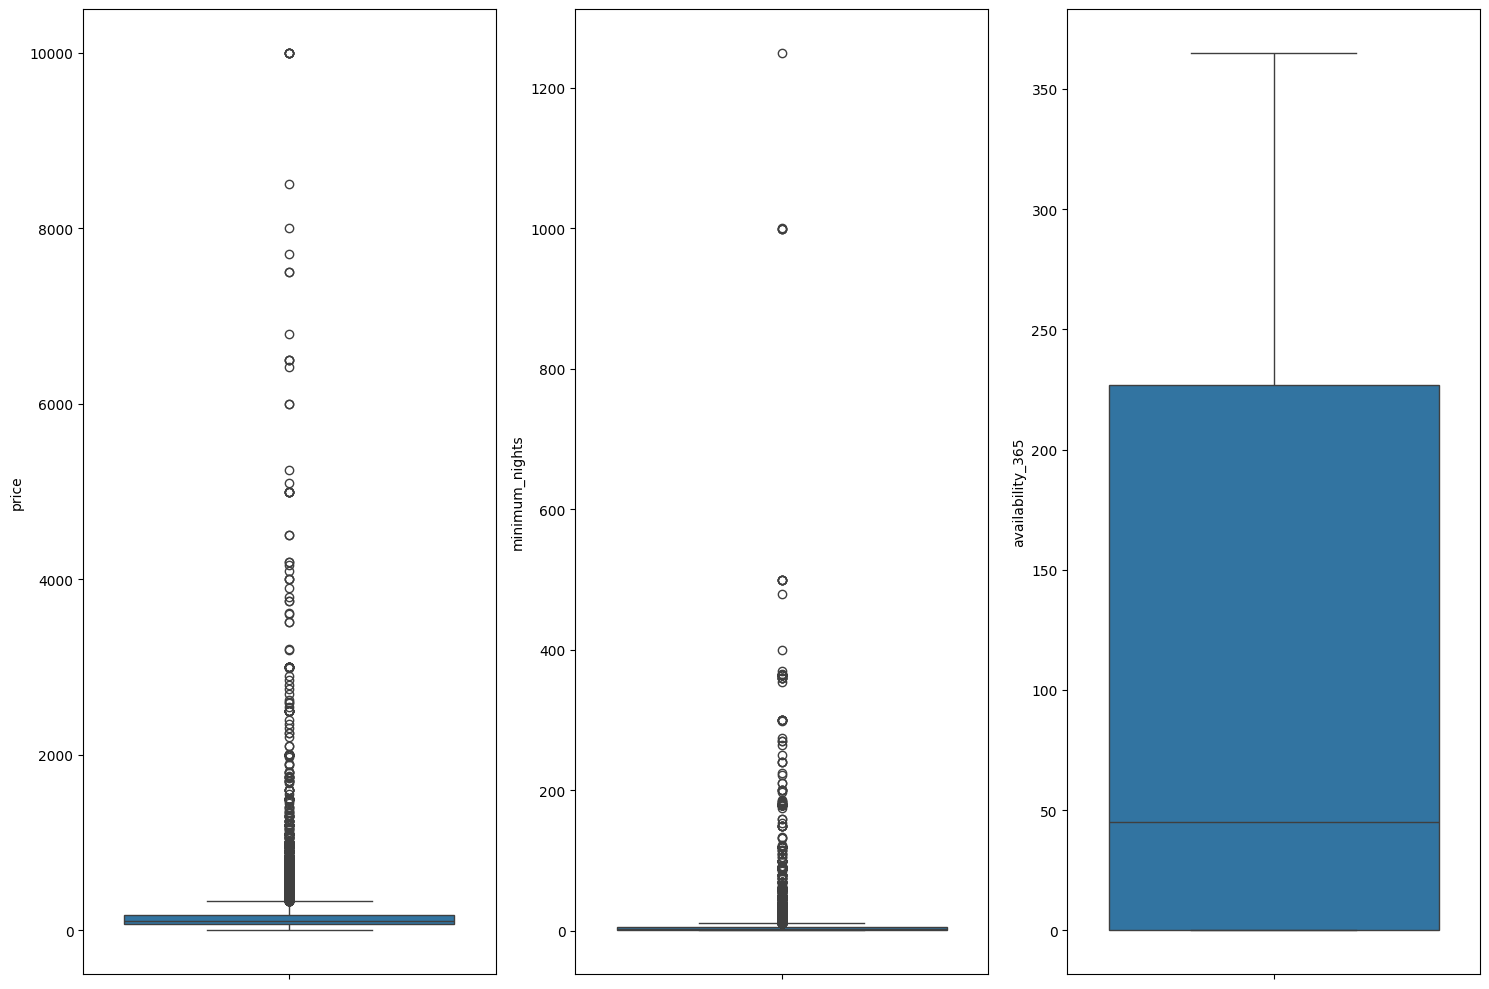

In [11]:
fig, axis = plt.subplots(1, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0], data = data, y = "price")
sns.boxplot(ax = axis[1], data = data, y = "minimum_nights")
sns.boxplot(ax = axis[2], data = data, y = "availability_365")


plt.tight_layout()

plt.show()

In [12]:
price_stats = data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [13]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [14]:
data[data["price"] > 8000]

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
6530,4737930,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,0.02,1,0
9151,7003697,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,0.04,1,0
12342,9528920,3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,0.14,1,83
17692,13894339,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,0.16,1,0
29238,22436899,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,NaN,1,83
30268,23377410,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,0.18,1,251
40433,31340283,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,NaN,1,365


In [15]:
data.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
host_name                            21
id                                    0
neighbourhood_group                   0
host_id                               0
neighbourhood                         0
latitude                              0
room_type                             0
longitude                             0
price                                 0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
#Escalado de valroes
from sklearn.model_selection import train_test_split

num_variables = ["latitude", "longitude", "minimum_nights", "availability_365"]

# Dividimos el conjunto de datos en muestras de train y test
X = data[num_variables] #Datos de caracteristicas
y = data["price"]  #variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()


,latitude,longitude,minimum_nights,availability_365
32645,40.71577,-73.95530,3,1
23615,40.84917,-73.94048,2,0
31183,40.68993,-73.95947,2,0
29260,40.68427,-73.93118,3,267
7275,40.74705,-73.89564,5,0


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,latitude,longitude,minimum_nights,availability_365
32645,0.522612,0.542691,0.001601,0.002740
23615,0.845404,0.570660,0.000801,0.000000
31183,0.460087,0.534821,0.000801,0.000000
29260,0.446391,0.588212,0.001601,0.731507
7275,0.598301,0.655286,0.003203,0.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,latitude,longitude,minimum_nights,availability_365
32645,0.522612,0.542691,0.001601,0.002740
23615,0.845404,0.570660,0.000801,0.000000
31183,0.460087,0.534821,0.000801,0.000000
29260,0.446391,0.588212,0.001601,0.731507
7275,0.598301,0.655286,0.003203,0.000000


In [20]:
X_train_scal["price"] = list(y_train)
X_test_scal["price"] = list(y_test)
X_train_scal.to_csv('../data/processed/clean_titanic_train.csv', index=False)
X_test_scal.to_csv('../data/processed/clean_titanic_test.csv', index=False)
